## Compute the total area of multiple rectangles

In [147]:
import numpy as np

# use list to construct datas
# nodes = [[1_x1, 1_y1, 1_x2, 1_y2], ... , [n_x1, n_y1, n_x2, n_y2]]
def rec_area_union(nodes):
    x = []
    y = []
    for node in nodes:
        x.append(node[0])
        y.append(node[1])
        x.append(node[2])
        y.append(node[3])

    x = list(set(x))
    x.sort()
    y = list(set(y))
    y.sort()
    
    # mark the area covered by nodes in area_map
    area_map = [[0 for col in range(len(y))] for row in range(len(x))]
    for node in nodes:
        left_x = x.index(node[0])
        right_x = x.index(node[2])
        upper_y = y.index(node[1])
        down_y = y.index(node[3])

        for x_ind in range(left_x, right_x):
            for y_ind in range(upper_y, down_y):
                # remove duplicate areas by keeping setting them to one
                area_map[x_ind][y_ind] = 1
    
    area_sum = 0
    for row in range(len(area_map) - 1):
        for col in range(len(area_map[0]) - 1):
            if area_map[row][col]:
                area_sum += (x[row + 1] - x[row]) * (y[col + 1] - y[col]) 
        
    return area_sum

# test code
nodes = [
        [1,1,2,5],
        [1,2,4,4],
        [3,1,5,3]
    ]

nodes2 = [
        [5.2,7.9,10.7,9.8],
        [2.3,4.9,8.8,8.4],
        [12.5,11.1,15.6,13.8]
    ]

print('Totol areas of rectangles described in nodes: ' + str(rec_area_union(nodes)))
print('Totol areas of rectangles described in nodes2: ' + str(rec_area_union(nodes2)))

Totol areas of rectangles described in nodes: 11
Totol areas of rectangles described in nodes2: 39.77


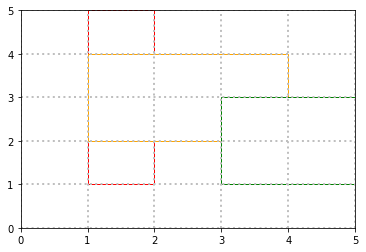

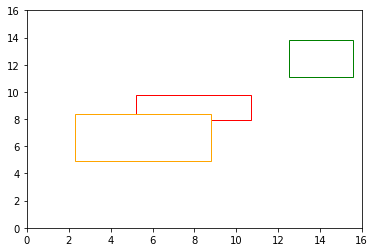

In [144]:
# draw the picture of the whole area
import matplotlib.pyplot as plt
import matplotlib.patches as patches

color = ['red', 'orange', 'green']

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid(which='major', axis='x', linewidth=2, linestyle=':', color='0.75')
ax1.grid(which='major', axis='y', linewidth=2, linestyle=':', color='0.75')
ax1.set_xbound(0, 5)
ax1.set_ybound(0, 5)
c_ind = 0
for node in nodes:
    rect = plt.Rectangle(
        (node[0], node[1]),   # (x,y)
        node[2] - node[0],    # width
        node[3] - node[1],    # height
        edgecolor = color[c_ind],  # color of edge
        facecolor = 'white'        # fill color
    )
    ax1.add_patch(rect)
    c_ind += 1
    
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_xbound(0, 16)
ax2.set_ybound(0, 16)
c_index = 0
for node in nodes2:
    rect = plt.Rectangle(
        (node[0], node[1]),   # (x,y)
        node[2] - node[0],    # width
        node[3] - node[1],    # height
        edgecolor = color[c_index],  # color of edge
        facecolor = 'white'        # fill color
    )
    ax2.add_patch(rect)
    c_index += 1
    

plt.show()